In [119]:
import requests
import numpy as np
import pandas as pd
import datetime # represent dates


In [120]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)

In [121]:
#rocket data information api 
rocketApiUrl = "https://api.spacexdata.com/v4/rockets/"
launchpadApiUrl = "https://api.spacexdata.com/v4/launchpads/"
payloadApiUrl = "https://api.spacexdata.com/v4/payloads/"
coresApiUrl = "https://api.spacexdata.com/v4/cores/"

In [122]:
#retrieving booster version information from rocket api using rocket column data
def getBoosterVersion(data):
    for x in data["rocket"]:
        if x:
            response = requests.get(rocketApiUrl + str(x)).json()
            BoosterVersion.append(response["name"])

In [123]:
#retrieving launchpad data using api call from launchapd column
def getLaunchSite(data):
    for x in data["launchpad"]:
        if x:
            response = requests.get(launchpadApiUrl + str(x)).json()
            Longitude.append(response["longitude"])
            Latitude.append(response["latitude"])
            LaunchSite.append(response["name"])
            

In [124]:
#retrieve payload data using payload column
def getPayloadData(data):
    for x in data["payloads"]:
        if x:
            response = requests.get(payloadApiUrl + str(x)).json()
            PayloadMass.append(response["mass_kg"])
            Orbit.append(response["orbit"])
            

In [125]:

def getCoreData(data):
    c = 0
    f = 0
    for core in data["cores"]:
        if core["core"] != None:
            response = requests.get(coresApiUrl + str(core["core"])).json()
            Block.append(response["block"])
            ReusedCount.append(response["reuse_count"])
            Serial.append(response["serial"])
        else:

            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)
        Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
        Flights.append(core['flight'])
        GridFins.append(core['gridfins'])
        Reused.append(core['reused'])
        Legs.append(core['legs'])
        LandingPad.append(core['landpad'])
                        

In [126]:
#request past rocket launch data from spacex
spacex_url = "https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

In [127]:
#make requested json results more consistent by static response object
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [128]:
response.status_code

200

In [130]:
df = pd.json_normalize(response.json())

In [131]:
df.columns.values

array(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships',
       'capsules', 'payloads', 'launchpad', 'flight_number', 'name',
       'date_utc', 'date_unix', 'date_local', 'date_precision',
       'upcoming', 'cores', 'auto_update', 'tbd', 'launch_library_id',
       'id', 'fairings.reused', 'fairings.recovery_attempt',
       'fairings.recovered', 'fairings.ships', 'links.patch.small',
       'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media',
       'links.reddit.recovery', 'links.flickr.small',
       'links.flickr.original', 'links.presskit', 'links.webcast',
       'links.youtube_id', 'links.article', 'links.wikipedia', 'fairings'],
      dtype=object)

In [132]:
data = df[["rocket","payloads","launchpad","flight_number","cores","date_utc"]]

In [133]:
# remove the takeoffs containing more than 1 core, meaning they have 2 extra rocket boosters
# remove the takeoffs containing more than 1 payload,
filteredData = data
data = data[data["cores"].map(len) == 1]
data = data[data["payloads"].map(len) == 1]
# since core and payload data are list of size 1, extract the data and make it a value

data["cores"] = data["cores"].map(lambda x: x[0])
data["payloads"] = data["payloads"].map(lambda x: x[0])


# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

In [134]:
#restrict the date of launches
data = data[data["date"] <= datetime.date(2020,11,13)]

In [135]:
#since our data frame mostly contains ids for the extraction of values through other api's
#we create global lists to store those value results

BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [136]:
getBoosterVersion(data)
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [137]:
getLaunchSite(data)
LaunchSite[0:5]

['Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'CCSFS SLC 40']

In [138]:
getPayloadData(data)
PayloadMass[0:5]

[20, None, 165, 200, None]

In [139]:
getCoreData(data)

In [141]:
#create a new dataframe with the new datalist

launch_dict = {"FlightNumber": list(data["flight_number"]),
               "Date": list(data["date"]),
               "BoosterVersion":BoosterVersion,
               "PayloadMass":PayloadMass,
               "Orbit":Orbit,
               "LaunchSite":LaunchSite,
               "Outcome":Outcome,
               "Flights":Flights,
               "GridFins":GridFins,
               "Reused":Reused,
               "Legs":Legs,
               "LandingPad":LandingPad,
               "Block":Block,
               "ReusedCount":ReusedCount,
               "Serial":Serial,
               "Longitude":Longitude,
               "Latitude":Latitude}

In [143]:
list(map(len,list(launch_dict.values())))

[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94]

In [144]:
launch_df = pd.DataFrame.from_dict(launch_dict)

In [145]:
launch_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [146]:
launch_df["BoosterVersion"].unique()

array(['Falcon 1', 'Falcon 9'], dtype=object)

In [147]:
#remove falcon1
data_falcon9 = launch_df[launch_df["BoosterVersion"]=="Falcon 9"]

In [148]:
data_falcon9.shape[0]

90

In [149]:
#reset the flight numbers as ranged id's
falcon9_data_size = data_falcon9.shape[0]
data_falcon9.loc[:,"FlightNumber"] = list(range(1,falcon9_data_size+1))
data_falcon9.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [150]:
#look for missing values
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [151]:
#calculate mean of payloadmass
PayloadMassMean = data_falcon9["PayloadMass"].mean()

In [152]:
#replace null data with mean value
data_falcon9["PayloadMass"].fillna(PayloadMassMean, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [153]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [ ]:
data_falcon9.to_csv("dataset_falcon9.csv",index=False)

In [ ]:
import os

In [ ]:
os.listdir()

## Scraping the data on web instead of using apis, an alternative data collection scenario


In [ ]:
!pip3 install beautifulsoup4
!pip3 install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [ ]:
scrapeUrl = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"

In [ ]:
response = requests.get(scrapeUrl)

In [ ]:
soup = BeautifulSoup(response.content,"html.parser")

In [ ]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [ ]:
if(soup.title):
    print(f"soup successful with title: {soup.title.text}")

soup successful with title: List of Falcon 9 and Falcon Heavy launches - Wikipedia


In [ ]:
html_tables = []

In [ ]:
for table in soup.find_all('table'):
    html_tables.append(table)
    

In [ ]:
# I used this code in website console to find out the index of a desired table
# var i = 0; [].forEach.call(document.querySelectorAll('table'), function(x) { console.log(i++, x); });

In [ ]:
print(html_tables[2])

In [ ]:
column_names = []

In [ ]:
def extract_column_name_from_header(row):
  if row.br:
    row.br.extract()
  if row.a:
    row.a.extract()
  if row.sup:
    row.sup.extract()
  column_name = ''.join(row.contents)
  if not(column_name.strip().isdigit()):
    column_name = column_name.strip()
    return column_name

In [ ]:
type(html_tables[2])

bs4.element.Tag

In [ ]:
for row in html_tables[2].tbody.find_all("th"):
  rawname = extract_column_name_from_header(row)
  if(rawname is not None and len(rawname) > 0):
    column_names.append(rawname)

In [ ]:
column_names

['Flight No.',
 'Date andtime ()',
 'Launchsite',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launchoutcome']

In [ ]:
#create a dictionary using the list keys and remove date column
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date andtime ()']
del launch_dict["Launchsite"]
# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [ ]:
def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass

def date_time(table_cells):

    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def landing_status(table_cells):

    out=[i for i in table_cells.strings][0]
    return out

In [ ]:
extracted_row = 0
#extract each table data
for table_number, table in enumerate(soup.find_all("table","wikitable plainrowheaders collapsible")):
  for row in table.find_all("tr"):
    if row.th:
        if row.th.string:
            flight_number=row.th.string.strip()
            flag=flight_number.isdigit()
    else:
        flag = False
    data = row.find_all("td")
    if flag:
      extracted_row += 1
      launch_dict["Flight No."].append(flight_number)

      datatimelist = date_time(data[0])
      
      date = datatimelist[0].strip(',')
      launch_dict["Date"].append(date)
      
      time = datatimelist[1]
      launch_dict["Time"].append(time)
   
      booster_list = [booster_version.text for i,booster_version in enumerate(data[1].find_all('a'))]
      booster_version = ''.join(booster_list[0:2])
      
      launch_dict["Version Booster"].append(booster_version)


      launch_site = data[2].a.string
      launch_dict["Launch site"].append(launch_site)

      payload = data[3].a.string
      launch_dict["Payload"].append(payload)

      payload_mass = get_mass(data[4])
      launch_dict["Payload mass"].append(payload_mass)

      orbit = data[5].a.string
      launch_dict["Orbit"].append(orbit)

      if data[6].a:
        customer = data[6].a.string
      else:
        customer = data[6].string
      launch_dict["Customer"].append(customer)

      launch_outcome = list(data[7].strings)[0]
      launch_dict["Launch outcome"].append(launch_outcome)

      booster_landing = landing_status(data[8])
      launch_dict["Booster landing"].append(booster_landing)


In [ ]:
df=pd.DataFrame(launch_dict)

In [ ]:
df

,Flight No.,Payload,Payload mass,Orbit,Customer,Launchoutcome,Launch site,Launch outcome,Version Booster,Booster landing,Date,Time
0,78,Starlink,"15,600 kg",LEO,SpaceX,None,CCAFS,Success\n,F9 B5B1049.4,Success,7 January 2020,02:19:21
1,79,Crew Dragon in-flight abort test,"12,050 kg",Sub-orbital,NASA,None,KSC,Success\n,F9 B5B1046.4,No attempt\n,19 January 2020,15:30
2,80,Starlink,"15,600 kg",LEO,SpaceX,None,CCAFS,Success\n,F9 B5B1051.3,Success,29 January 2020,14:07
3,81,Starlink,"15,600 kg",LEO,SpaceX,None,CCAFS,Success\n,F9 B5B1056.4,Failure,17 February 2020,15:05
4,82,SpaceX CRS-20,"1,977 kg",LEO,NASA,None,CCAFS,Success\n,F9 B5B1059.2,Success,7 March 2020,04:50
...,...,...,...,...,...,...,...,...,...,...,...,...
100,178,Crew-5,"~13,000 kg",LEO,NASA,None,KSC,Success\n,F9 B5B1077.1,Success,5 October 2022,16:00
101,179,Starlink Group 4-29,"~16,100 kg",LEO,SpaceX,None,VSFB,Success\n,F9 B5B1071.5,Success,5 October 2022,23:10
102,180,[399],"7,350 kg",GTO,Intelsat,None,CCSFS,Success\n,F9 B5B1060.14,Success,8 October 2022,23:05
103,181,Hotbird 13F,"~4,500 kg",GTO,Eutelsat,None,CCSFS,Success\n,F9 B5B1069.3,Success,15 October 2022,05:22


# DATA WRANGLING

In [154]:
# Ppercentage of null values for each category
data_falcon9.isnull().sum()/data_falcon9.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [80]:
data_falcon9.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [155]:
data_falcon9["LaunchSite"].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [156]:
data_falcon9["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [159]:
landing_outcomes = data_falcon9["Outcome"].value_counts()

In [160]:
for i,outcome in enumerate(landing_outcomes.keys()):
  print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [162]:
# ones with false and none values are bad outcomes, filter them
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])

bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [175]:
#now we can filter data in outcome column to 0s and 1s if they are successful or not
outcome_b = [1 if (x not in bad_outcomes) else 0 for x in data_falcon9["Outcome"]]

In [195]:
data_falcon9.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [210]:
data_falcon9.loc[:,"Outcome"]

4       None None
5       None None
6       None None
7     False Ocean
8       None None
         ...     
89      True ASDS
90      True ASDS
91      True ASDS
92      True ASDS
93      True ASDS
Name: Outcome, Length: 90, dtype: object

In [211]:
data_falcon9["Outcome Mapped"] = outcome_b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [213]:
data_falcon9[["Outcome Mapped"]].head(8)

,Outcome Mapped
4,0
5,0
6,0
7,0
8,0
9,0
10,1
11,1


In [218]:
#determine the success rate
print("Falcon9 historical success rate:",round(data_falcon9["Outcome Mapped"].mean()*100,2),"%")

Falcon9 historical success rate: 66.67 %


In [222]:
data_falcon9.to_csv("dataset_part_2.csv",index = False)

In [223]:
import os
os.listdir()

['.config', 'dataset_part_2.csv', 'sample_data']

# Explarotary Data Analysis through Visualization

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

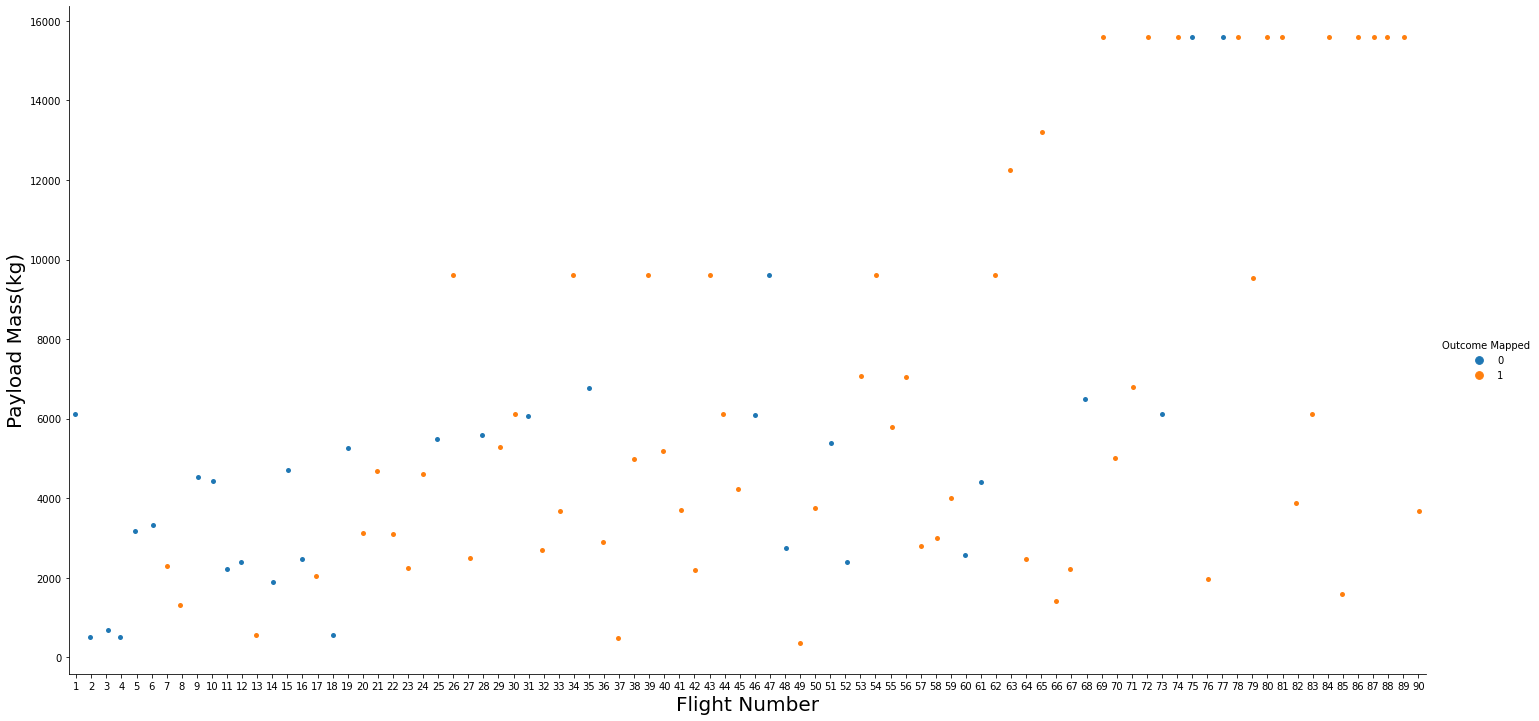

In [237]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Outcome Mapped",data = data_falcon9, height = 10, aspect =2)
plt.xlabel("Flight Number",fontsize =20)
plt.ylabel("Payload Mass(kg)",fontsize =20)
plt.show()

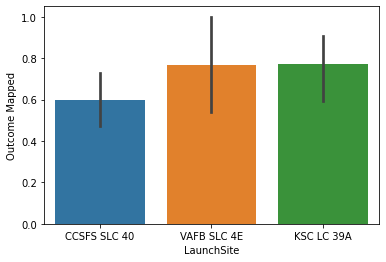

In [248]:
 # barplot shows that 2nd and 3rd launchites has better success rates
sns.barplot(data = data_falcon9, y="Outcome Mapped", x = "LaunchSite")

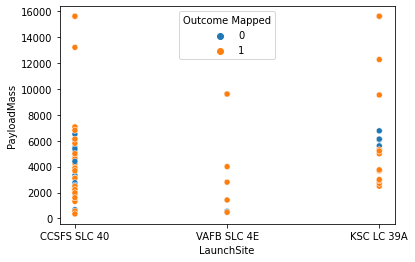

In [249]:
#Payload versus launch site graph with success
sns.scatterplot(data = data_falcon9, y="PayloadMass", x="LaunchSite", hue="Outcome Mapped")

In [255]:
data_falcon9.groupby("Orbit").mean()[["Outcome Mapped"]]

,Outcome Mapped
Orbit,
ES-L1,1.000000
GEO,1.000000
GTO,0.518519
HEO,1.000000
ISS,0.619048
LEO,0.714286
MEO,0.666667
PO,0.666667
SO,0.000000


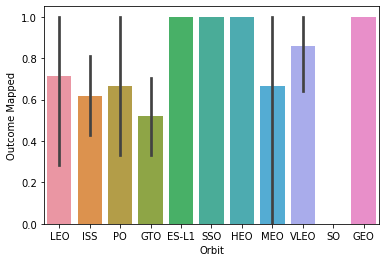

In [250]:
sns.barplot(data = data_falcon9, y="Outcome Mapped", x = "Orbit")

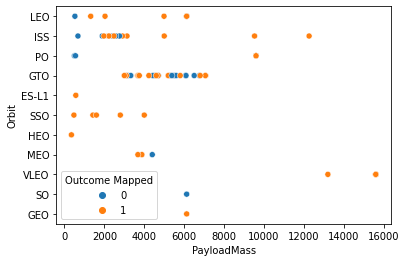

In [256]:
#orbit vs payloadmass graph with success
sns.scatterplot(data = data_falcon9, x="PayloadMass", y="Orbit", hue="Outcome Mapped")

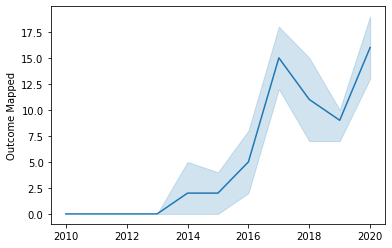

In [267]:
#Visualizing yearly success trend
years = []
def Extract_year(years):
  for date in data_falcon9["Date"]:
    years.append(date.year)
Extract_year(years)

sns.lineplot(x = years, y = data_falcon9["Outcome Mapped"], estimator = np.count_nonzero)

# Feature Engineering - Modifying dataset for machine learning models 

In [275]:
#Select the features that will be used in success prediction
features = data_falcon9[["FlightNumber","PayloadMass","Orbit","LaunchSite","Flights",'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

In [277]:
features.shape

(90, 12)

In [278]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
4,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0003
5,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0005
6,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0007
7,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,None,1.0,0,B1003
8,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B1004


In [279]:
# columns Orbit, Launchsite, LandingPad and Serial contain text categories,
# converting them to encoded ones (indexes), by using OneHotEncoder

features_one_hot = pd.get_dummies(features[["LaunchSite","LandingPad","Orbit","Serial"]])

In [280]:
features_one_hot.head()

,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [282]:
features_one_hot.shape

(90, 72)

In [288]:
features_one_hot.astype("float64")

,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
91,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [289]:
#creating the feature dataset containing encoded columns

features_enc = features.join(features_one_hot)

In [290]:
features_enc

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0003,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0005,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0007,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,None,1.0,0,B1003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B1004,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,15600.000000,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
90,87,15600.000000,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
91,88,15600.000000,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
92,89,15600.000000,VLEO,CCSFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [291]:
features_one_hot.to_csv("falcon9_encoded_feature_dataset.csv",index=False)

# Map visualization with Folium

In [ ]:
!pip3 install folium
!pip3 install wget

In [293]:
import folium
import wget
import pandas as pd

In [294]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [295]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

In [296]:
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouère cheese",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [327]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
coordinates = launch_sites_df[["Lat","Long"]].values.tolist()
launch_sites_df["Cordinate"] = coordinates
launch_sites_df

,Launch Site,Lat,Long,Cordinate
0,CCAFS LC-40,28.562302,-80.577356,"[28.56230197, -80.57735648]"
1,CCAFS SLC-40,28.563197,-80.576820,"[28.56319718, -80.57682003]"
2,KSC LC-39A,28.573255,-80.646895,"[28.57325457, -80.64689529]"
3,VAFB SLC-4E,34.632834,-120.610745,"[34.63283416, -120.6107455]"


In [350]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [351]:
def Create_map_circles(coordinate,color,name):

  circle = folium.Circle(coordinate, radius=1000, color=color, fill=True).add_child(folium.Popup(name))
  
  marker = folium.map.Marker(
      nasa_coordinate,
      # Create an icon as a text label
      icon=DivIcon(
          icon_size=(20,20),
          icon_anchor=(0,0),
          html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'LAUNCH SITE',
          )
      )
  site_map.add_child(circle)
  site_map.add_child(marker)


In [352]:
#I will use folium.Circle to add a highlighted circle area with a text label

Create_map_circles(nasa_coordinate,'#d35400','NASA Johnson Space Center')


for coordinate,name in zip(launch_sites_df["Cordinate"],launch_sites_df["Launch Site"]):

  Create_map_circles(coordinate,'#d35400',name)



In [353]:
site_map